#upload

In [1]:
from google.colab import files
import os
import matplotlib.pyplot as plt

# Upload the file
print("Please upload your file:")
uploaded = files.upload()

# Display the current working directory
print("\nCurrent Working Directory:", os.getcwd())


Please upload your file:


Saving train.csv to train.csv

Current Working Directory: /content


## Question 1: Determine the blank values in the data

In [6]:
import os
import pandas as pd
from tabulate import tabulate

# Define the file name
file_path = "train.csv"

# Verify if the file exists in the current directory
if os.path.exists(file_path):

    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)

    # Print the first few rows in a well-formatted table
    print(tabulate(data.head(), headers="keys", tablefmt="fancy_grid"))


╒════╤═══════════════╤════════════╤══════════╤═════════════════════════════════════════════════════╤════════╤═══════╤═════════╤═════════╤══════════════════╤═════════╤═════════╤════════════╕
│    │   PassengerId │   Survived │   Pclass │ Name                                                │ Sex    │   Age │   SibSp │   Parch │ Ticket           │    Fare │ Cabin   │ Embarked   │
╞════╪═══════════════╪════════════╪══════════╪═════════════════════════════════════════════════════╪════════╪═══════╪═════════╪═════════╪══════════════════╪═════════╪═════════╪════════════╡
│  0 │             1 │          0 │        3 │ Braund, Mr. Owen Harris                             │ male   │    22 │       1 │       0 │ A/5 21171        │  7.25   │ nan     │ S          │
├────┼───────────────┼────────────┼──────────┼─────────────────────────────────────────────────────┼────────┼───────┼─────────┼─────────┼──────────────────┼─────────┼─────────┼────────────┤
│  1 │             2 │          1 │        1 │ Cum

## Question 2: Determine the task for loading of handling the data

In [7]:
from tabulate import tabulate
import io

# Capture dataset information as a structured string
buffer = io.StringIO()
df.info(buf=buffer)
dataset_info = buffer.getvalue()

# Process dataset info into a structured table format
dataset_info_table = [line.split(":") for line in dataset_info.split("\n") if ":" in line]

# Display dataset overview in a formatted table
print("\n📊 DATASET OVERVIEW:\n")
print(tabulate(dataset_info_table, tablefmt="fancy_grid") if dataset_info_table else "No detailed dataset info available.")

# Generate summary statistics
summary_stats = df.describe().reset_index()

# Identify missing values per column
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ["Column", "Missing Values"]
missing_values = missing_values[missing_values["Missing Values"] > 0]

# Display summary statistics
print("\n📈 STATISTICAL SUMMARY:\n")
print(tabulate(summary_stats, headers="keys", tablefmt="fancy_grid"))

# Display missing values, if any
if not missing_values.empty:
    print("\n🚨 MISSING VALUES PER COLUMN:\n")
    print(tabulate(missing_values, headers="keys", tablefmt="fancy_grid"))



📊 DATASET OVERVIEW:

╒═════════════════════════════════╤══════════════════════════════════════════════╕
│ RangeIndex                      │ 891 entries, 0 to 890                        │
├─────────────────────────────────┼──────────────────────────────────────────────┤
│ Data columns (total 13 columns) │                                              │
├─────────────────────────────────┼──────────────────────────────────────────────┤
│ dtypes                          │ category(1), float64(2), int64(5), object(5) │
├─────────────────────────────────┼──────────────────────────────────────────────┤
│ memory usage                    │ 84.9+ KB                                     │
╘═════════════════════════════════╧══════════════════════════════════════════════╛

📈 STATISTICAL SUMMARY:

╒════╤═════════╤═══════════════╤════════════╤════════════╤══════════╤════════════╤════════════╤══════════╕
│    │ index   │   PassengerId │   Survived │     Pclass │      Age │      SibSp │      Parch │    

## Question 3: Determine the Survival Rate

In [8]:
# Compute the average survival rate
mean_survival_rate = df["Survived"].mean()

# Display the formatted result
print("\n📊 SURVIVAL RATE ANALYSIS\n" + "─" * 30)
print(f"✅ Mean Survival Rate: {mean_survival_rate:.2%}")  # Display as a percentage
print("─" * 30)



📊 SURVIVAL RATE ANALYSIS
──────────────────────────────
✅ Mean Survival Rate: 38.38%
──────────────────────────────


## Question 4: Determine the Average age of Survivors




<ipython-input-10-257daba69d4c>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_counts = df.groupby("Age Group")["Survived"].value_counts().unstack()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


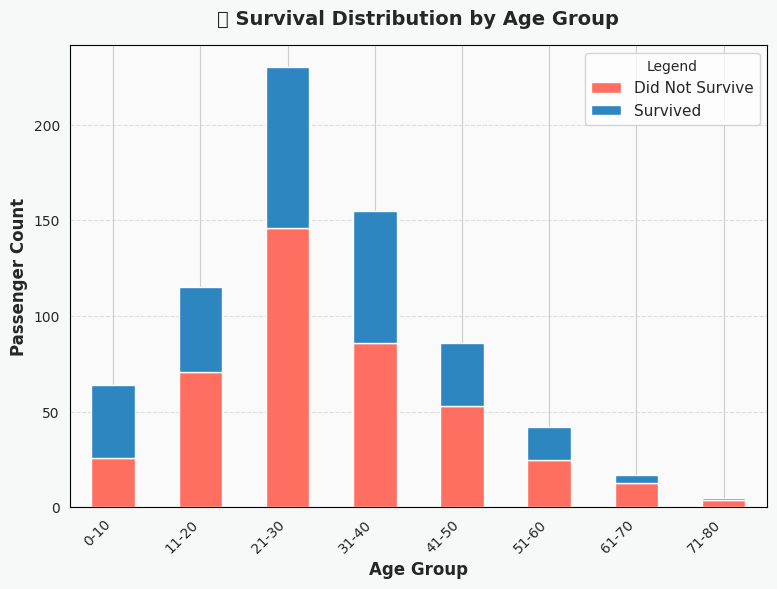

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for a modern look
sns.set_style("whitegrid")
plt.rcParams["axes.edgecolor"] = "black"  # Add black borders for clarity

# Define age group bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80"]

# Assign passengers to age groups
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels)

# Count survivors and non-survivors within each age group
age_survival_counts = df.groupby("Age Group")["Survived"].value_counts().unstack()

# Create a stylish stacked bar plot
fig, ax = plt.subplots(figsize=(9, 6))
age_survival_counts.plot(kind="bar", stacked=True, ax=ax, color=["#FF6F61", "#2E86C1"])

# Customize the plot aesthetics
ax.set_xlabel("Age Group", fontsize=12, fontweight="bold")
ax.set_ylabel("Passenger Count", fontsize=12, fontweight="bold")
ax.set_title("📊 Survival Distribution by Age Group", fontsize=14, fontweight="bold", pad=15)
ax.legend(["Did Not Survive", "Survived"], title="Legend", loc="upper right", fontsize=11)
ax.yaxis.grid(True, linestyle="--", alpha=0.6)  # Add subtle dashed grid lines

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# Add a background color for a cleaner look
fig.patch.set_facecolor("#F7F9F9")  # Light grayish background
ax.set_facecolor("#FAFAFA")  # Soft white inside plot area

# Display the enhanced plot
plt.show()
